The chart below depicts the number of users in each programming language. It is evident that SQL has the highest user base, followed by JavaScript. Additionally, HTML and Java have a nearly similar number of users.

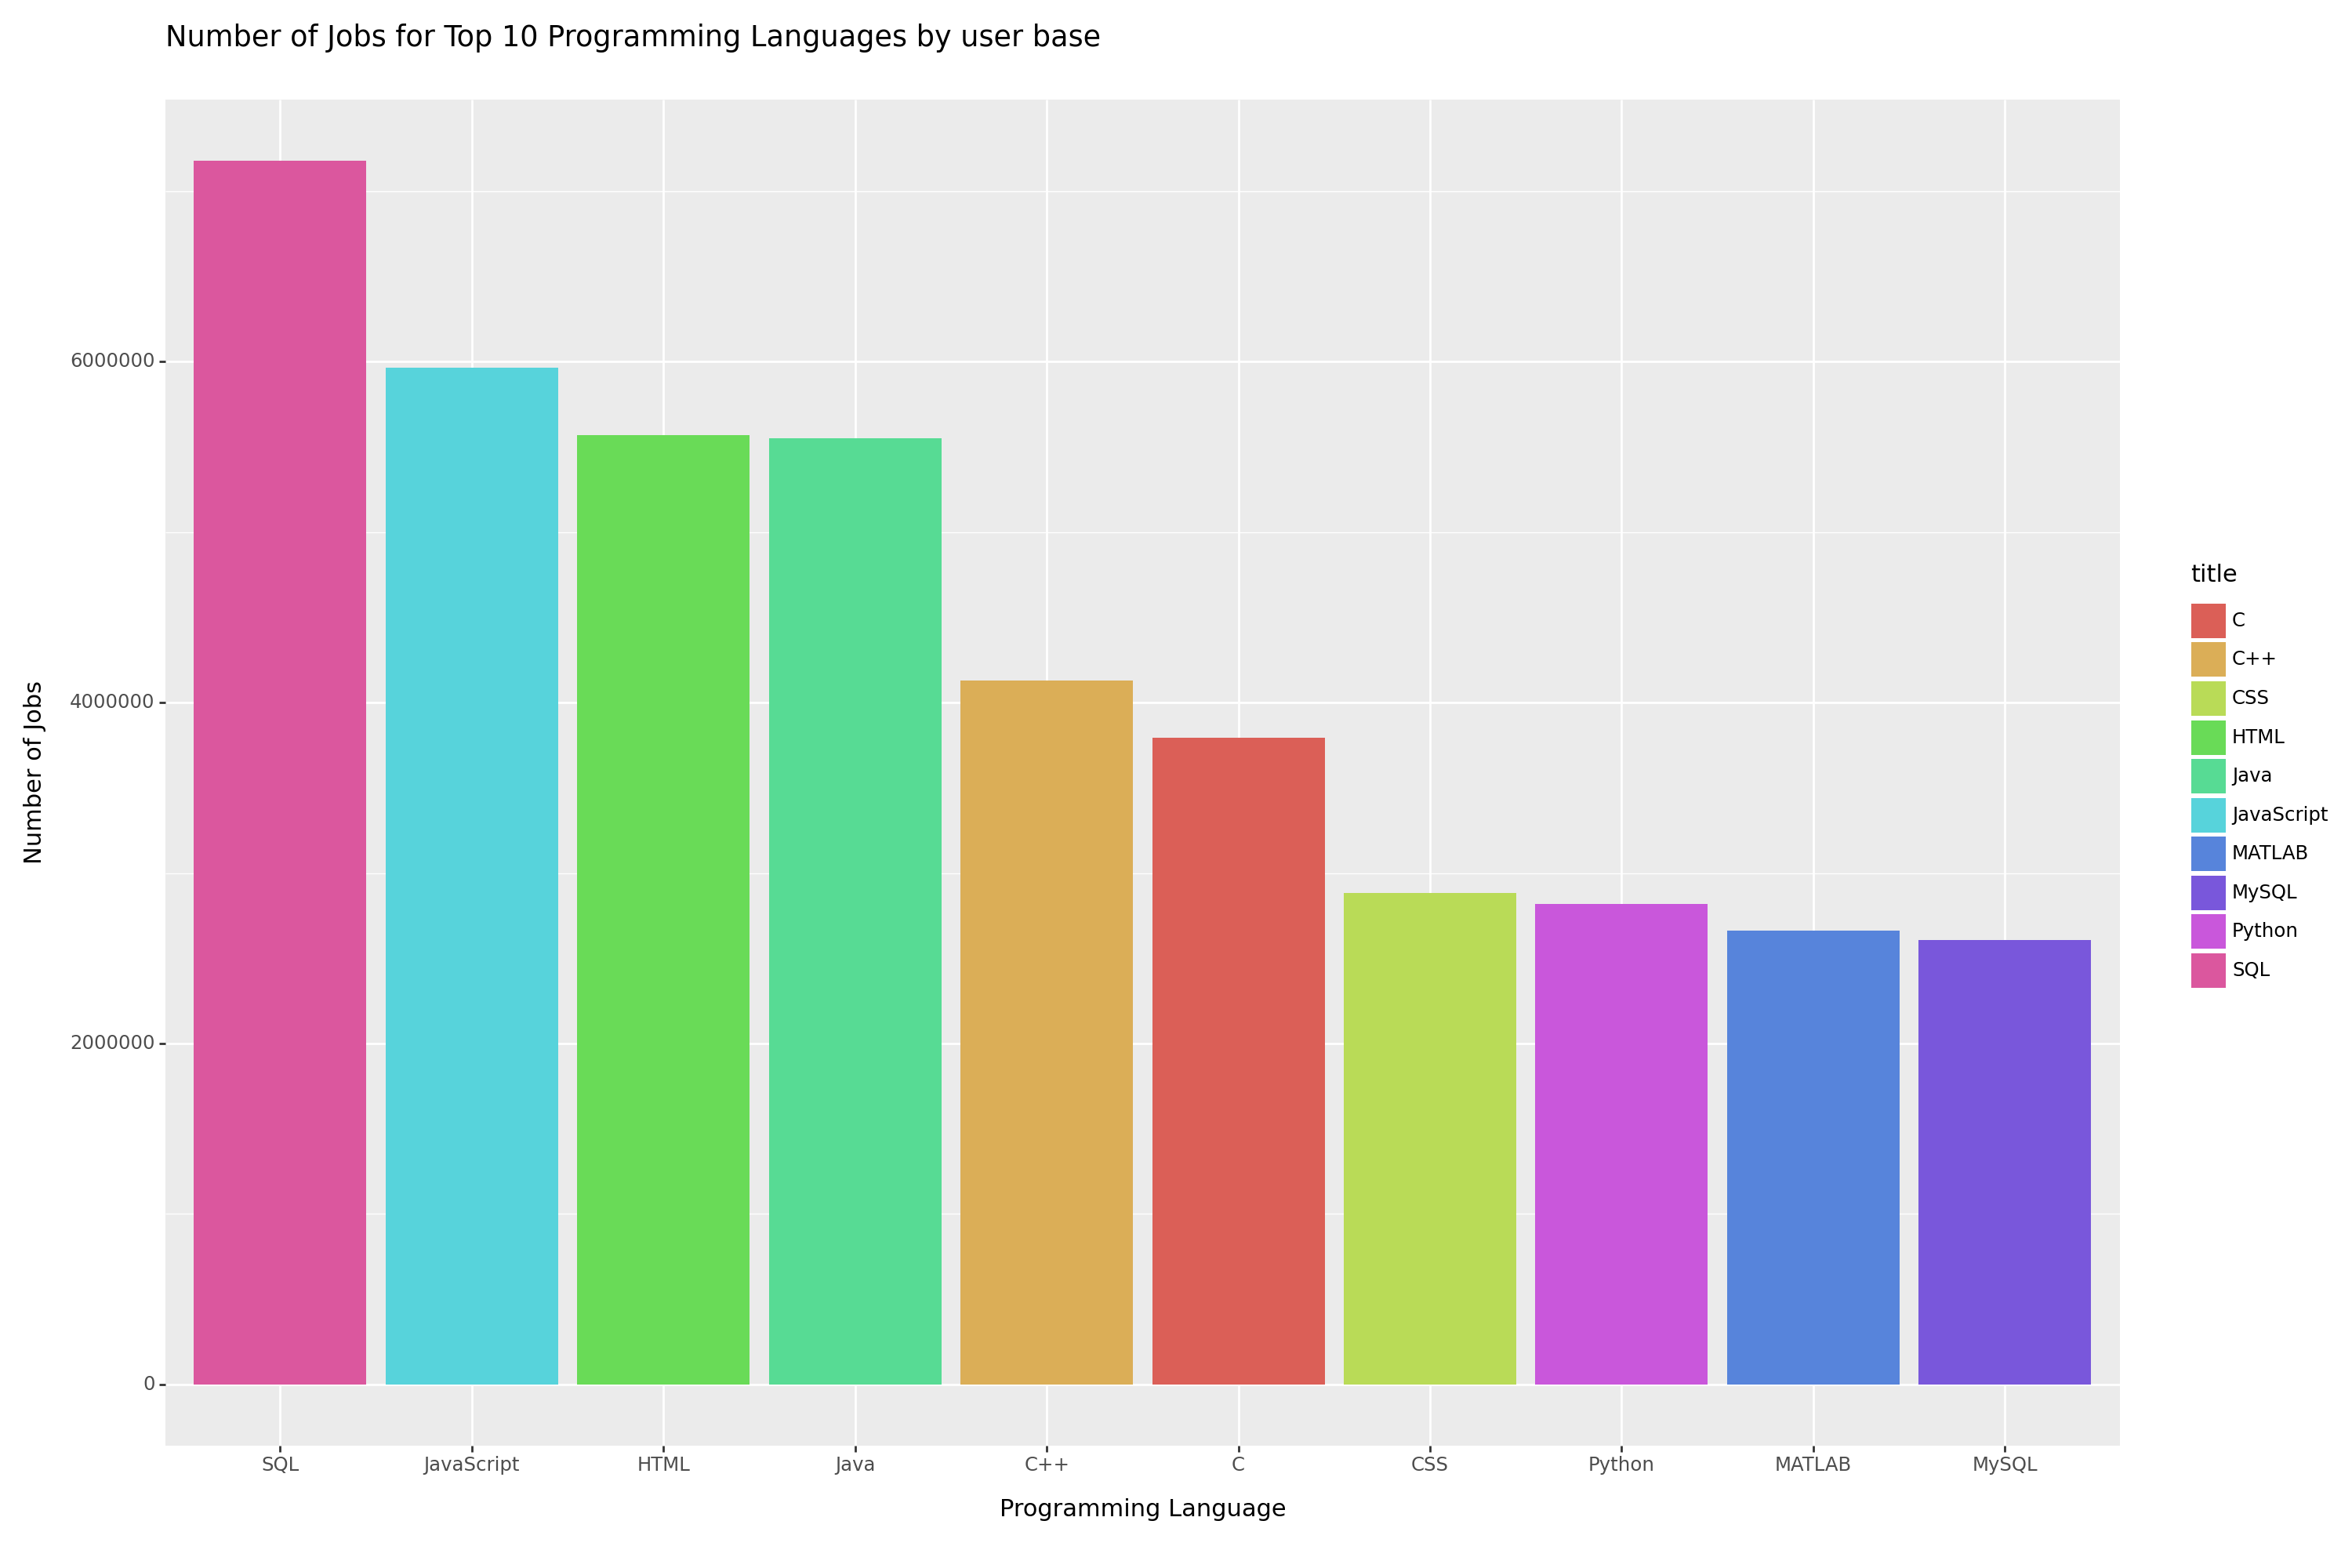

In [6]:

from plotnine import ggplot, aes, geom_tile, theme, element_text, element_blank, element_rect,geom_bar,ggplot, aes, geom_bar, labs, theme
import pandas as pd

url="https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-21/languages.csv"
language_by_user_df = pd.read_csv(url)
# Assuming you have the DataFrame named 'language_by_user_df' with the relevant columns

# Filter out rows with NaN values in 'number_of_jobs' column
language_by_user_df = language_by_user_df.dropna(subset=['number_of_users'])


# Sort the DataFrame by 'number_of_jobs' in descending order
language_by_user_df = language_by_user_df.sort_values(by='number_of_users', ascending=False)

# Keep the top 10 programming languages
top_languages = language_by_user_df.head(10)
aggregated_data = top_languages.copy()

# Create a bar plot using plotnine
plot = (
    ggplot(aggregated_data, aes(x='reorder(title,-number_of_users)', y='number_of_users', fill='title')) +
    geom_bar(stat='identity') +
    labs(title='Figure 01.Number of Jobs for Top 10 Programming Languages by user base', x='Programming Language', y='Number of Jobs')+
    theme(figure_size=(15, 10))
)


# Show the plot
print(plot)



n the 'Number of Jobs for Top 10 Programming Languages by Jobs' chart, it is observed that the HTTP language has a higher number of job opportunities compared to all other languages. This is intriguing, considering it did not have a higher user base, as seen in the previous chart. The next most in-demand language is SQL

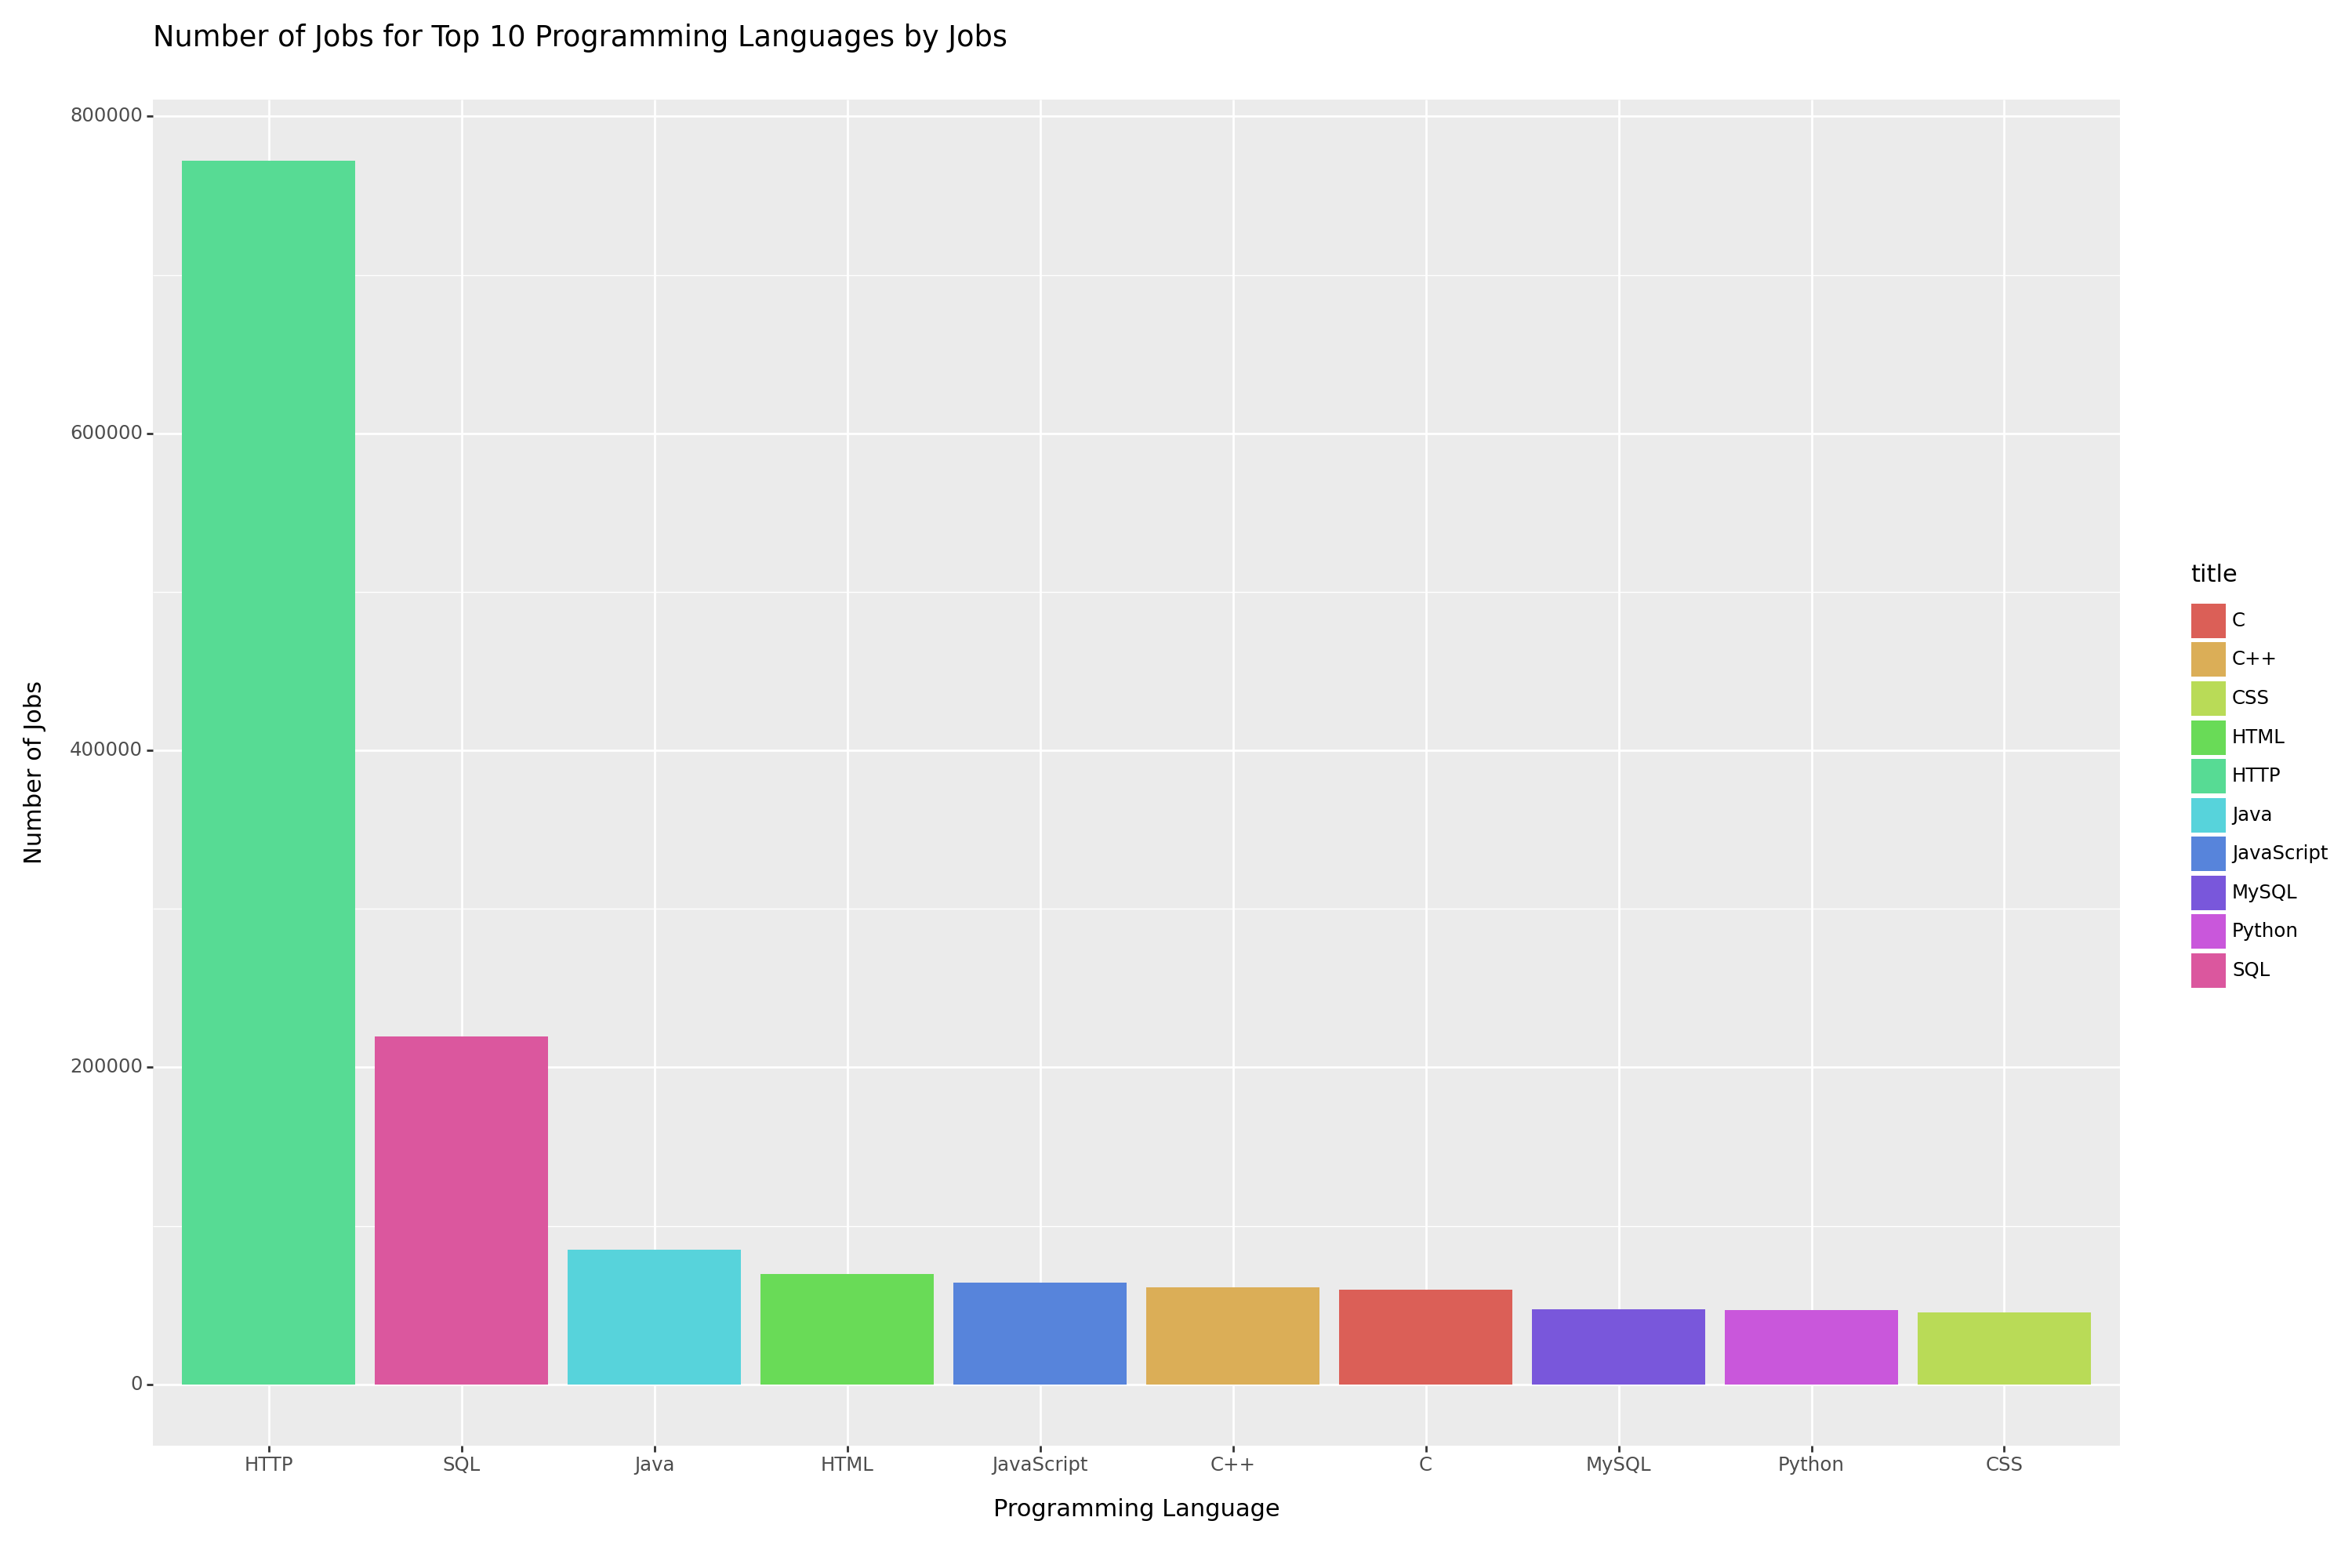

In [7]:


language_by_jobs_df = pd.read_csv(url)
# Assuming you have the DataFrame named 'language_by_jobs_df' with the relevant columns

# Filter out rows with NaN values in 'number_of_jobs' column
language_by_jobs_df = language_by_jobs_df.dropna(subset=['number_of_jobs'])



# Assuming you have the DataFrame named 'language_by_jobs_df' with the relevant columns

# Filter out rows with NaN values in 'number_of_jobs' column
language_by_jobs_df = language_by_jobs_df.dropna(subset=['number_of_jobs'])

# Sort the DataFrame by 'number_of_jobs' in descending order
language_by_jobs_df = language_by_jobs_df.sort_values(by='number_of_jobs', ascending=False)

# Keep the top 10 programming languages
top_languages = language_by_jobs_df.head(10)
aggregated_data = top_languages.copy()

# Create a bar plot using plotnine
plot = (
    ggplot(aggregated_data, aes(x='reorder(title,-number_of_jobs)', y='number_of_jobs', fill='title')) +
    geom_bar(stat='identity') +
    labs(title='Number of Jobs for Top 10 Programming Languages by Jobs', x='Programming Language', y='Number of Jobs')+
    theme(figure_size=(15, 10))
)


# Show the plot
print(plot)


The following density function describes a fascinating hidden story. It is evident that earlier inventions of programming languages tended not to be made open source. However, there is a notable trend with new programming language inventions, where there is a higher inclination to make them as open source language.

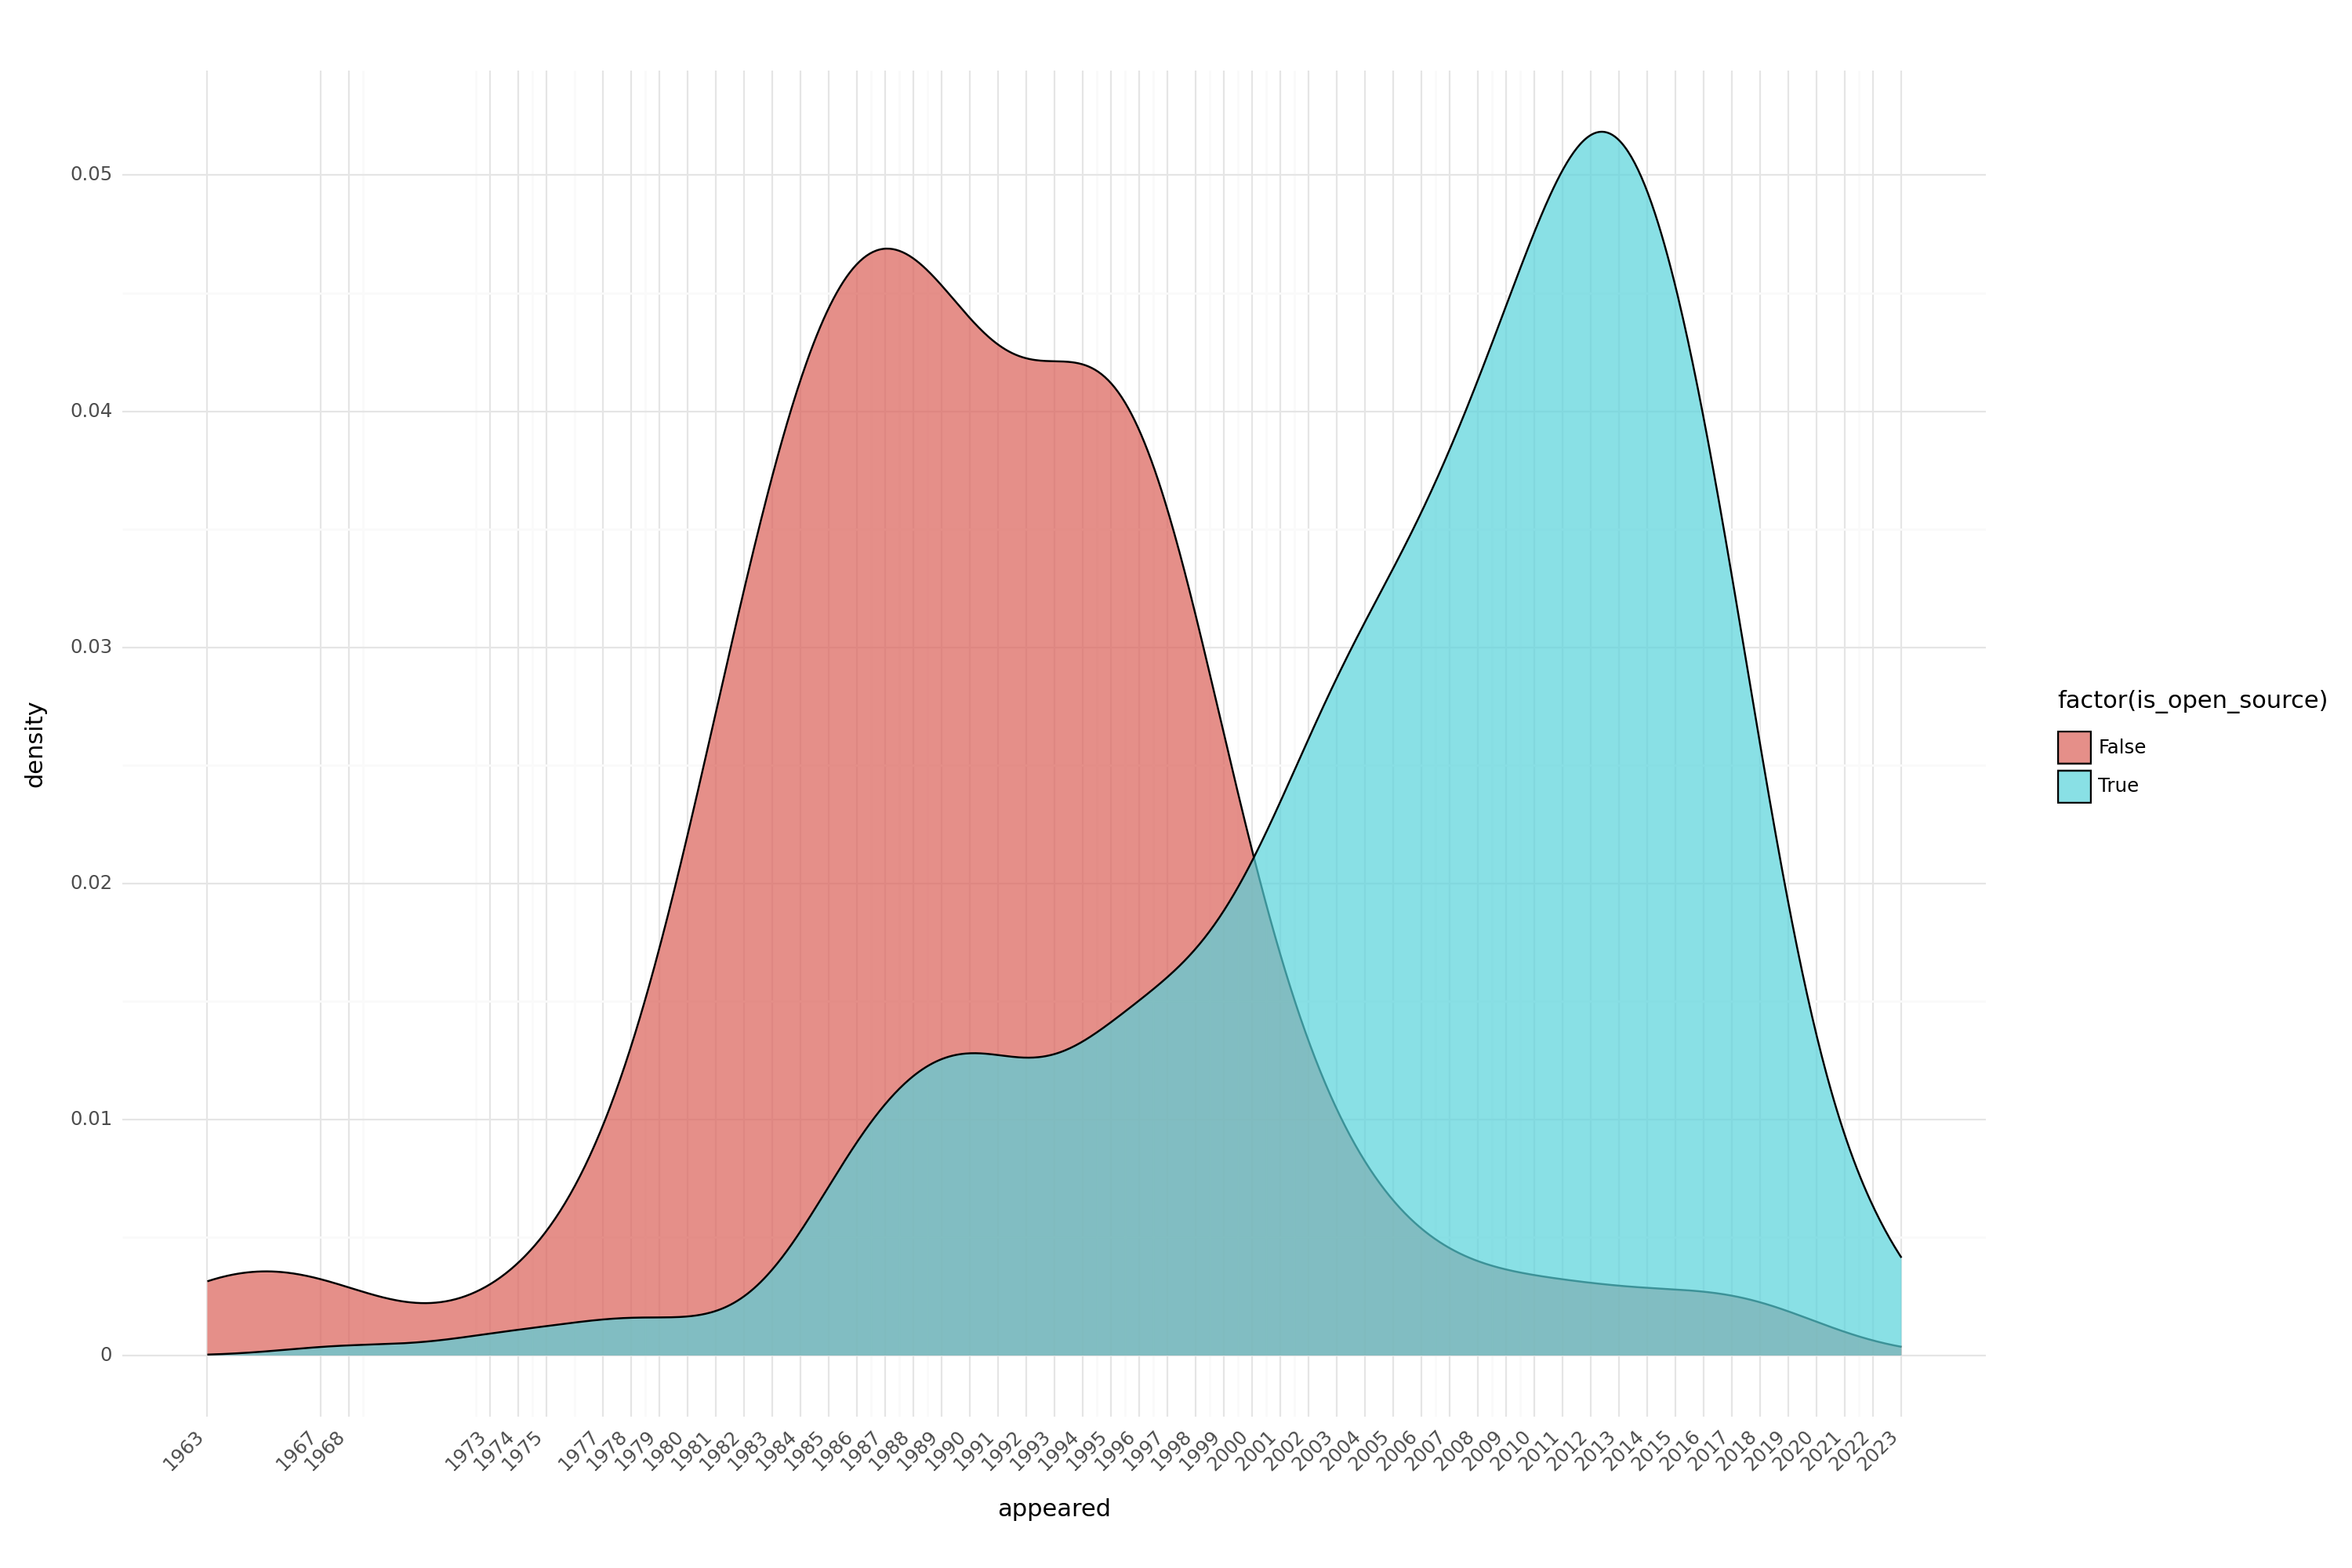

In [8]:
df = pd.read_csv(url)

geom_density_df=df[["appeared","number_of_users","title","is_open_source"]]


geom_density_df=geom_density_df.dropna()

geom_density_df=geom_density_df[geom_density_df['appeared']>1950]


# Create a ggplot object
plot = (
    ggplot(geom_density_df, aes(x='appeared', fill='factor(is_open_source)')) +
    geom_density(alpha=0.7) +  # Use alpha to control transparency
    scale_x_continuous(breaks=list(geom_density_df['appeared'].unique()), labels=list(geom_density_df['appeared'].unique())) +
    theme_minimal() +
    theme(figure_size=(15, 10), axis_text_x=element_text(angle=45, hjust=1))
)

# Show the plot
print(plot)


 believe it's better to explore the relationship between the number of users and programming types over the years. This reveals a surprising trend in the heatmap, where programming languages of the procedural type exhibit higher activity during the time period between 1995 and 2000. It appears that people are more inclined to work with procedural programming over the years.

/tmp/ipykernel_9924/3099394932.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


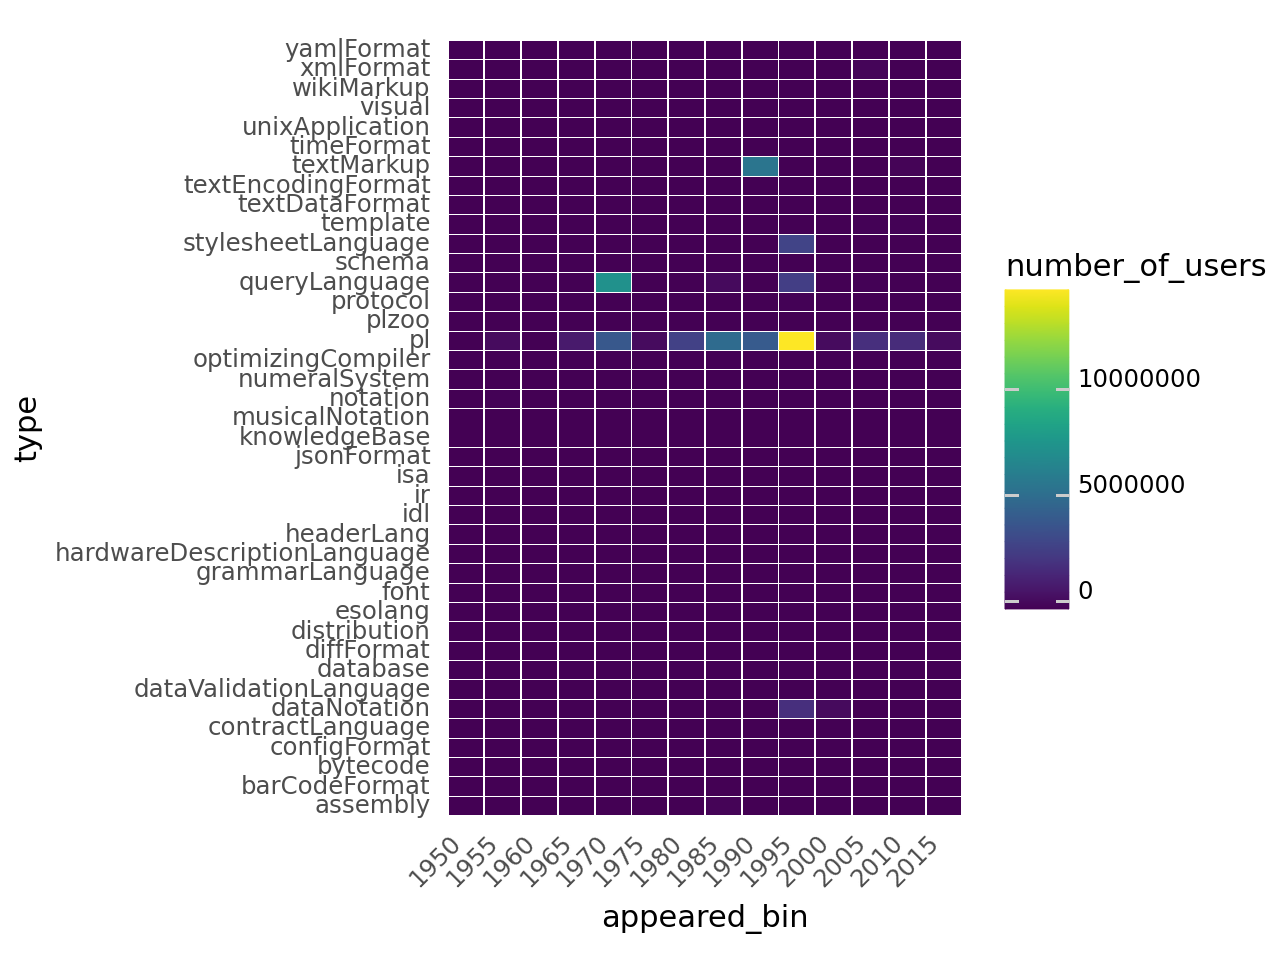

In [16]:
heatmap_df = pd.read_csv(url)

# Convert 'number_of_users' to numeric (if it's not already)
heatmap_df['number_of_users'] = pd.to_numeric(heatmap_df['number_of_users'], errors='coerce')

# Bin the 'appeared' column by 5 years
heatmap_df['appeared_bin'] = pd.cut(heatmap_df['appeared'], bins=range(1950, 2025, 5), right=False, labels=range(1950, 2020, 5))

# Aggregate 'number_of_users' within each bin
heatmap_df_agg = heatmap_df.groupby(['appeared_bin', 'type'], as_index=False)['number_of_users'].sum()

# Convert 'appeared_bin' to string type and fill NaN values with a placeholder
heatmap_df_agg['appeared_bin'] = heatmap_df_agg['appeared_bin'].astype(str).fillna('NaN')

# Create the annotated heatmap
annotated_heatmap = (
    ggplot(heatmap_df_agg, aes(x='appeared_bin', y='type', fill='number_of_users')) +
    geom_tile(aes(width=0.95, height=0.95)) +
    theme(
        axis_ticks=element_blank(),
        panel_background=element_rect(fill='white'),
        axis_text_x=element_text(angle=45, hjust=1),  # Adjust the angle as needed
        
    )
)

# Show plot
print(annotated_heatmap)


The following figure represents a very significant hidden factor where programming language (PL) types show a trend of evolving with new languages. An even more interesting finding is that people are showing a higher trend in exploring other categories, where they are discovering more new types of programming languages over the years, rather than sticking to one programming type other than PL. This clearly indicates that other programming language types are experiencing a decline over time.

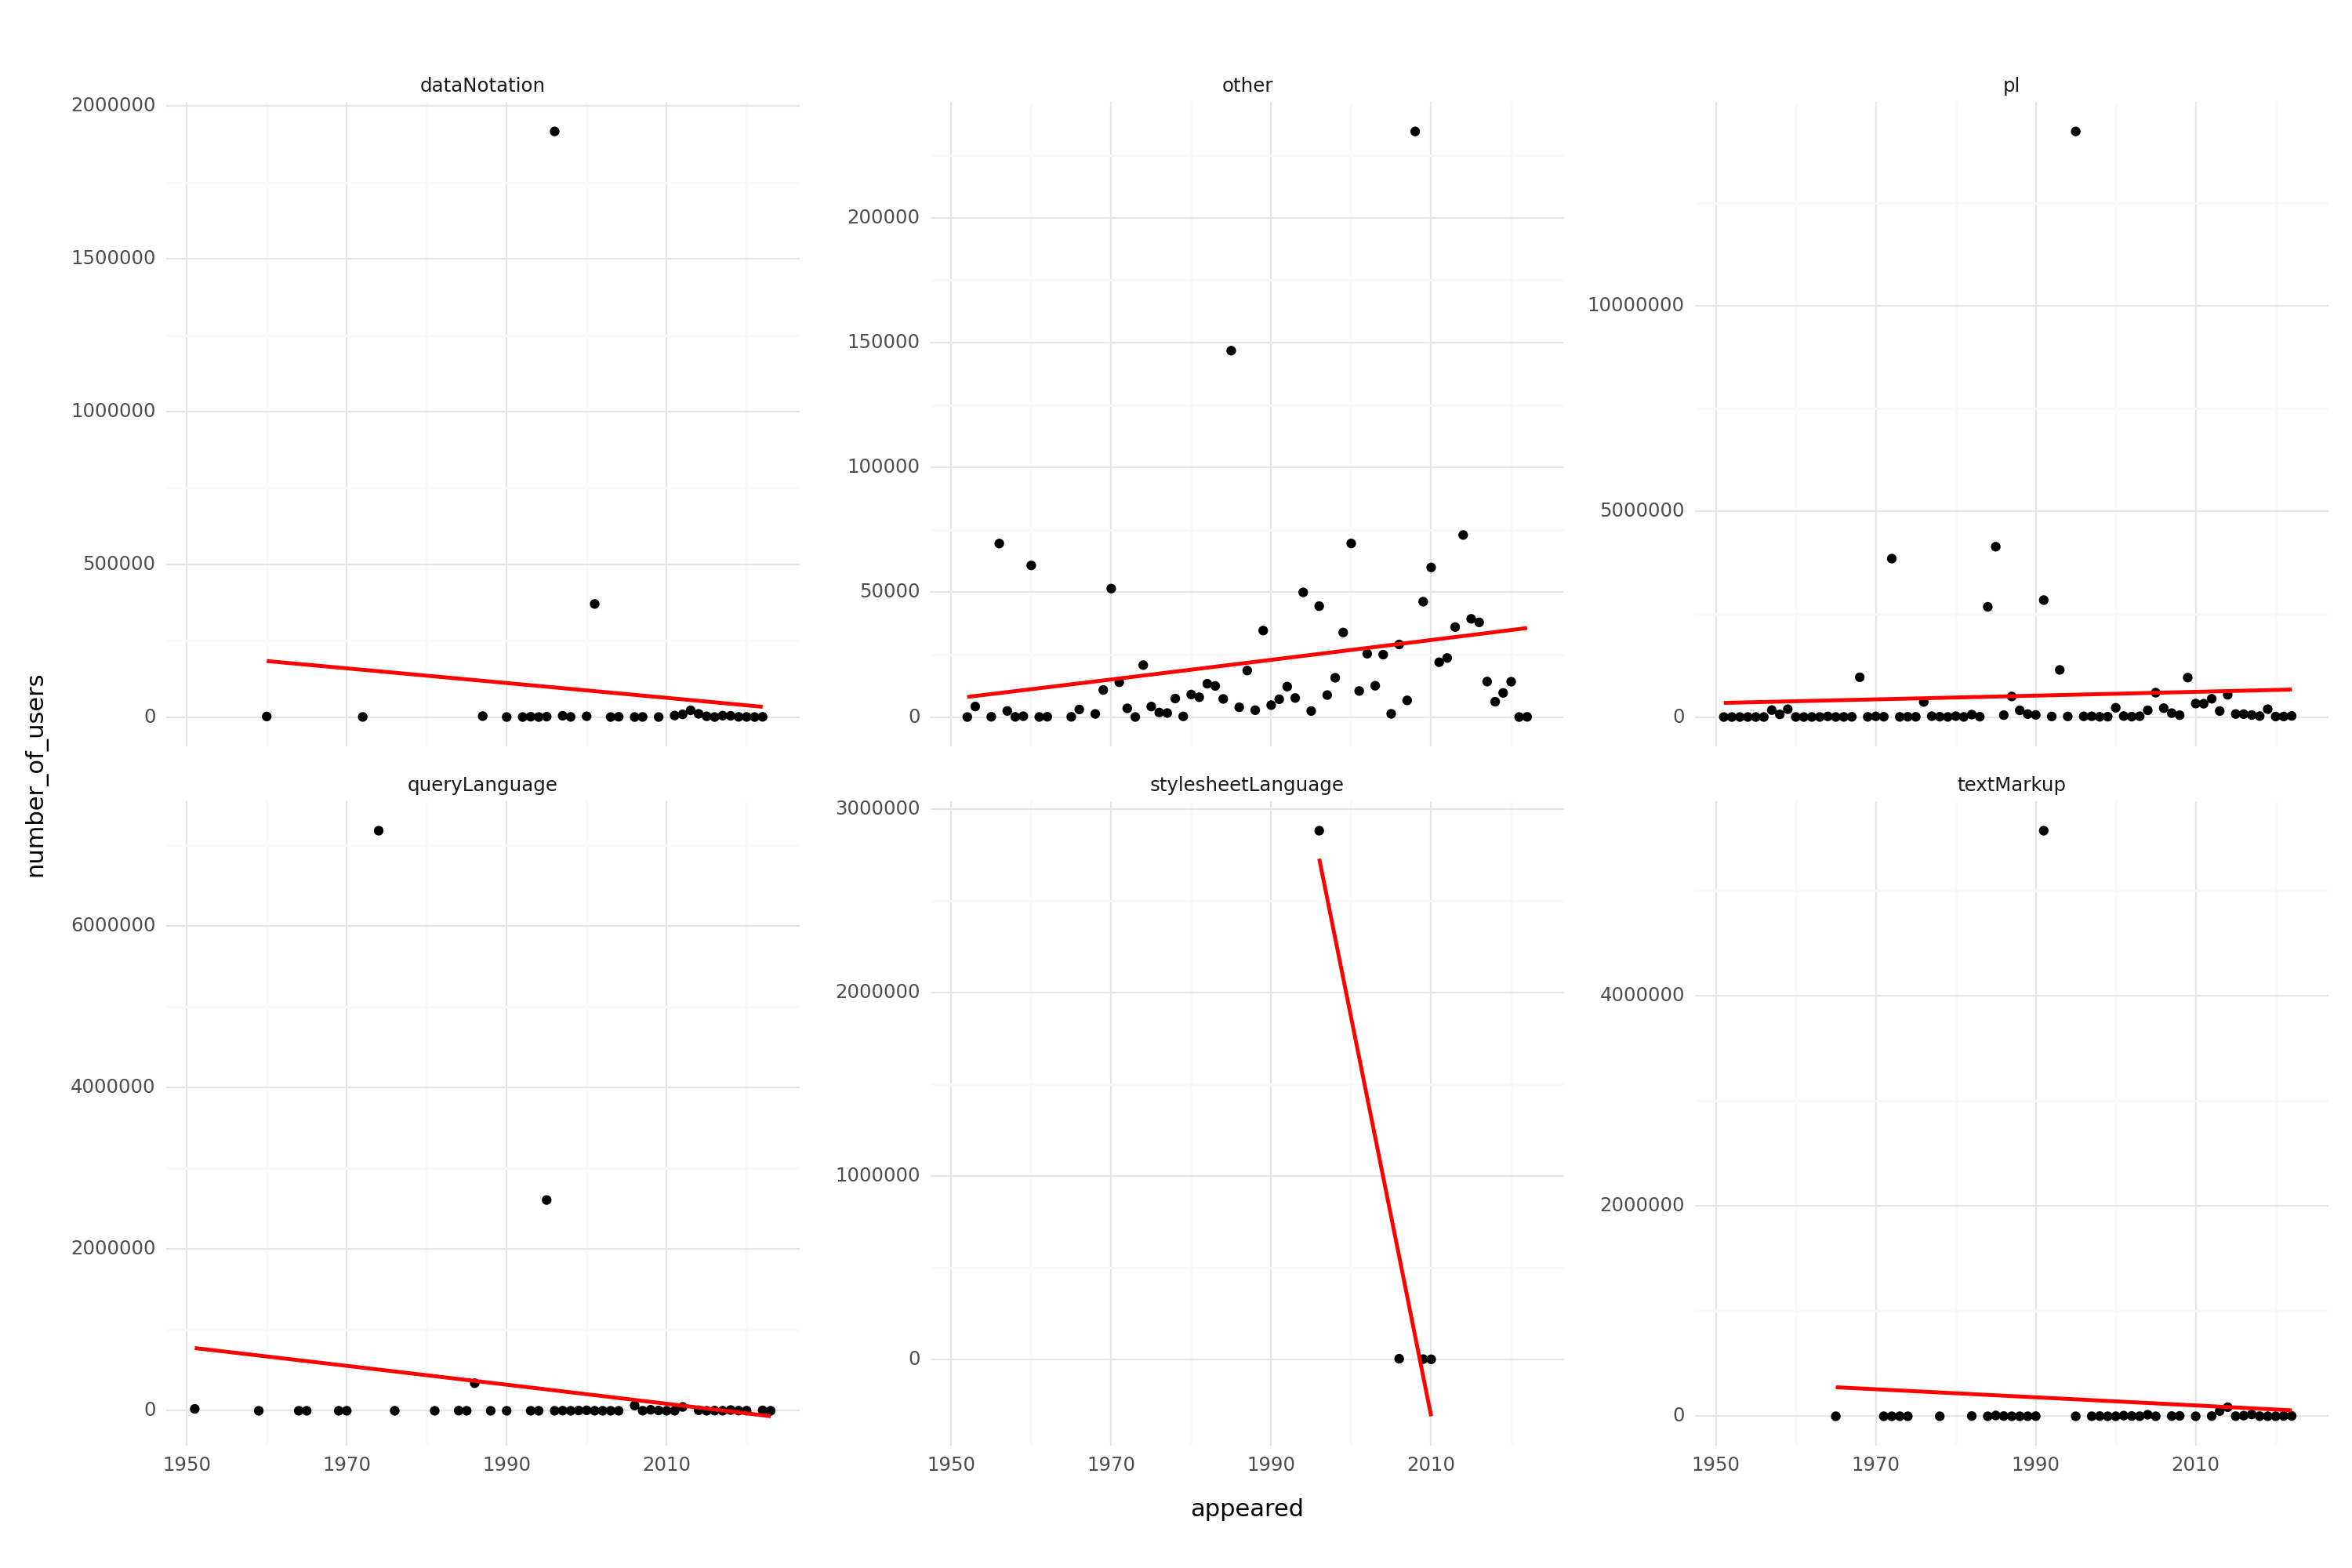

In [11]:
scatter_df = pd.read_csv(url)

scattered_df=scatter_df[["appeared","number_of_users","type"]]
scattered_df.dropna()
scattered_df=scattered_df[scattered_df['appeared']>1950]

main_10_types_df=scattered_df.groupby(["type"]).agg({"number_of_users":"sum"}).reset_index()
main_10_types_df = main_10_types_df.sort_values(by="number_of_users",ascending=False).head(5)["type"]

import numpy as np

scattered_df['type'] = np.where(~scattered_df['type'].isin(main_10_types_df), 'other', scattered_df['type'])
scattered_df['type'].unique()

scattered_df_gp = scattered_df.groupby(["appeared","type"]).agg({"number_of_users":"sum"}).reset_index()

# Import necessary libraries
from plotnine import ggplot, aes, geom_point, facet_wrap, stat_smooth, theme_minimal

# Create scatter plots with facets and curved fitted lines
scatter_plots_with_curved_lines = (
    ggplot(scattered_df_gp, aes(x='appeared', y='number_of_users')) +
    geom_point() +
    stat_smooth(method='lm', formula='y ~ I(x**2)', se=False, color='red') +  # Add a polynomial fitted line (degree=2)
    facet_wrap('~type', scales='free_y') +  # Facet by 'type'
    theme_minimal()  +# Optional: Customize the theme
   theme(figure_size=(15, 10))
)

# Show the plot
print(scatter_plots_with_curved_lines)


